In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


In [2]:
# Importing dataset
df=pd.read_csv(r'C:\Users\wania_96\Desktop\AMAZON_NLP\1429_1.csv')

C:\Users\wania_96\AppData\Local\Temp\ipykernel_4128\621777664.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\wania_96\Desktop\AMAZON_NLP\1429_1.csv')


In [3]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
df.shape

(34660, 21)

The dataset contains 34,660 rows and 21 columns. But we only need information such as product name, review text, user recommendation (binary), and the number of people that found a review helpful. Therefore, I am dropping other columns and reducing the dataset to only four columns, i.e., ‘name’, ‘reviews.text’, ‘reviews.doRecommend’, and ‘reviews.numHelpful’

In [5]:
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful','reviews.rating']]
df.head(5)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,reviews.rating
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0,5.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0,5.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0,5.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0,4.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0,5.0


Let’s see if there are any null values present in our dataset

In [6]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
reviews.rating           33
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
dtype: int64

I am only considering those products that have at least 500 reviews. I am doing this to make sure that I have a sufficient number of reviews for each product. Here, we will use lambda functions with filter() to filter our dataset.

In [8]:
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 8


In [9]:
df.dtypes

name                    object
reviews.text            object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
dtype: object

In [10]:
df['reviews.doRecommend'].unique()

array([True, False], dtype=object)

Now, we are left with eight products. Also,  the ‘reviews.doRecommend’ column contains values in the form of True-False and’ reviews.numHelpful’ contains floating-point numbers, which is not possible. Therefore, I am converting these columns into integers:

In [11]:
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

In [12]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

Take a close look at the title of products. Some product names contain repeating names separated by three consecutive commas (,,,). So, let’s clean the name of the products:

In [13]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])

Now, it’s time to move on to the second column – reviews.text’. This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset:

In [14]:
for index,text in enumerate(df['reviews.text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem


Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

Expand contractions
Lowercase the reviews
Remove digits and words containing digits
Remove punctuations
So, let’s start by expanding contractions.

Expand Contractions
Contractions are the shortened versions of words like don’t for do not and how’ll for how will. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews.

Here, I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms:

In [15]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [16]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

In [17]:
for index,text in enumerate(df['reviews.text'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It is fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem


Lowercase the reviews
In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:

In [18]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

Remove digits and words containing digits
Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [19]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [20]:
df['cleaned'].head()

0    this product so far has not disappointed. my c...
1    great for beginner or experienced person. boug...
2    inexpensive tablet for him to use and learn on...
3    i have had my fire hd  two weeks now and i lov...
4    i bought this for my grand daughter when she c...
Name: cleaned, dtype: object

Remove Punctuations
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [21]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [22]:
df['cleaned'].head()

0    this product so far has not disappointed my ch...
1    great for beginner or experienced person bough...
2    inexpensive tablet for him to use and learn on...
3    i have had my fire hd  two weeks now and i lov...
4    i bought this for my grand daughter when she c...
Name: cleaned, dtype: object

In [23]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [24]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 2:
 overall a nice product for traveling purposes value for money
Review 3:
 my children love this table great quality of pictures excellent camera
Review 4:
 i bought tablets and my family was not disappointed
Review 5:
 great tablet fast screen good size never gives me problem


Preparing Text Data for Exploratory Data Analysis (EDA)
We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus.
In this section, we’ll do the following things:

Stopwords Removal
Lemmatization
Create Document Term Matrix
Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.

In [25]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products:

In [26]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...
Echo (White),compete ipad high end android tablet easily ou...


In [27]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

C:\Users\wania_96\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,...,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zooming,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,...,4,0,0,0,0,2,0,2,0,0


Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

Exploratory Data Analysis on Amazon Product Reviews using Python
Yes – it’s finally time for Exploratory Data Analysis! It is a crucial part of any data science project because that’s where you get to know more about the data. In this phase, you can reveal hidden patterns in the data and generate insights from it.

So, let’s start by looking at the common words present in the reviews for each product. For this, I will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

Word clouds can be generated using the wordcloud library.

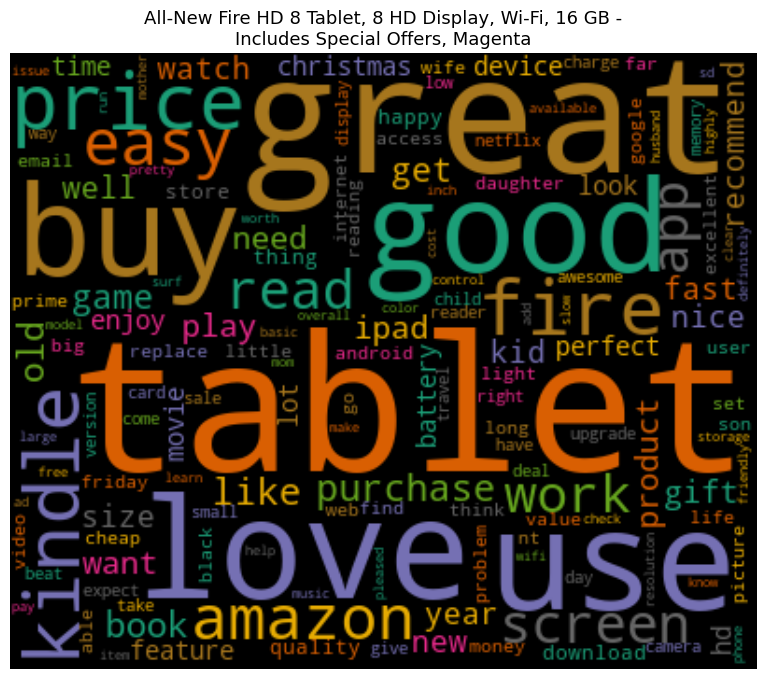

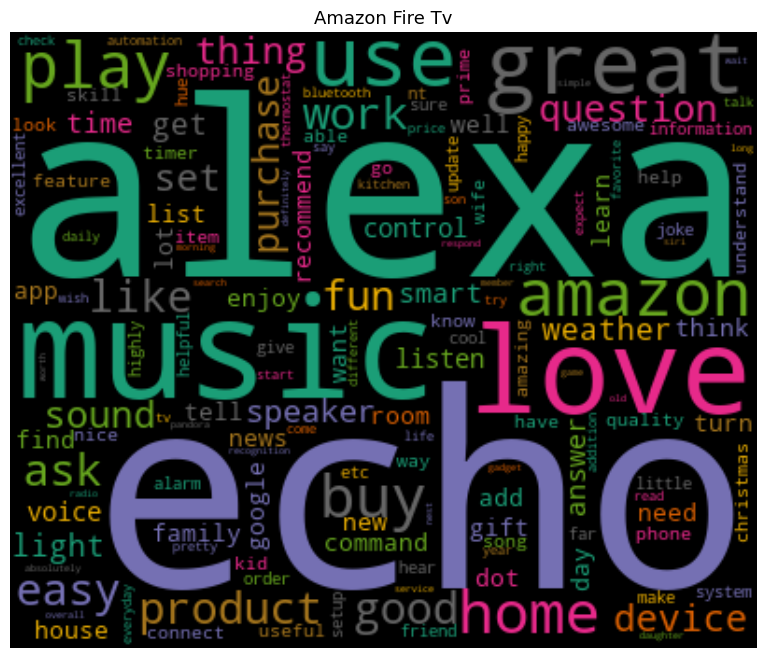

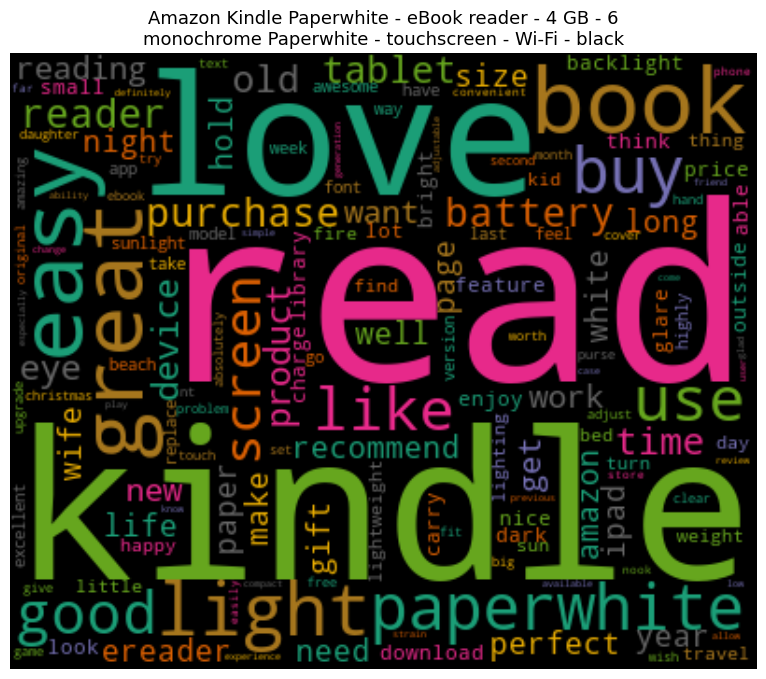

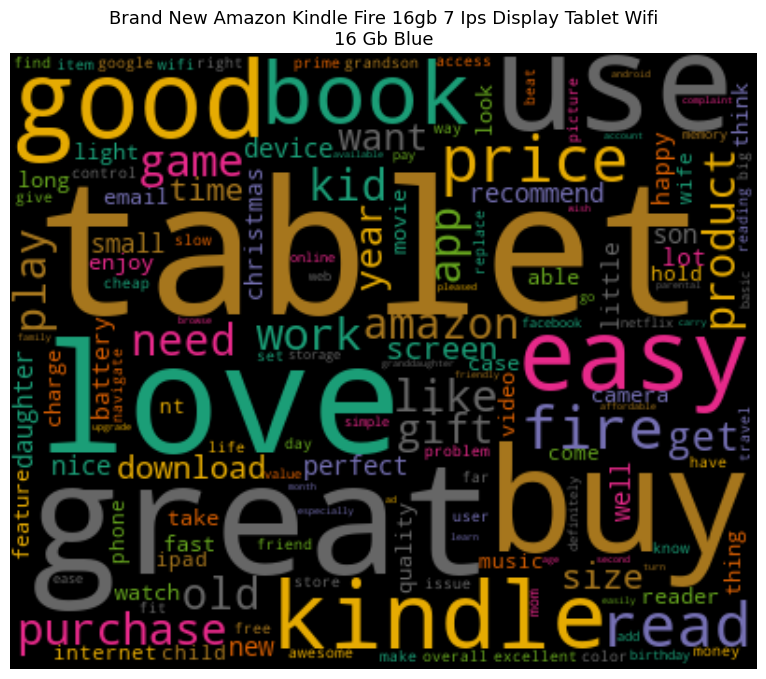

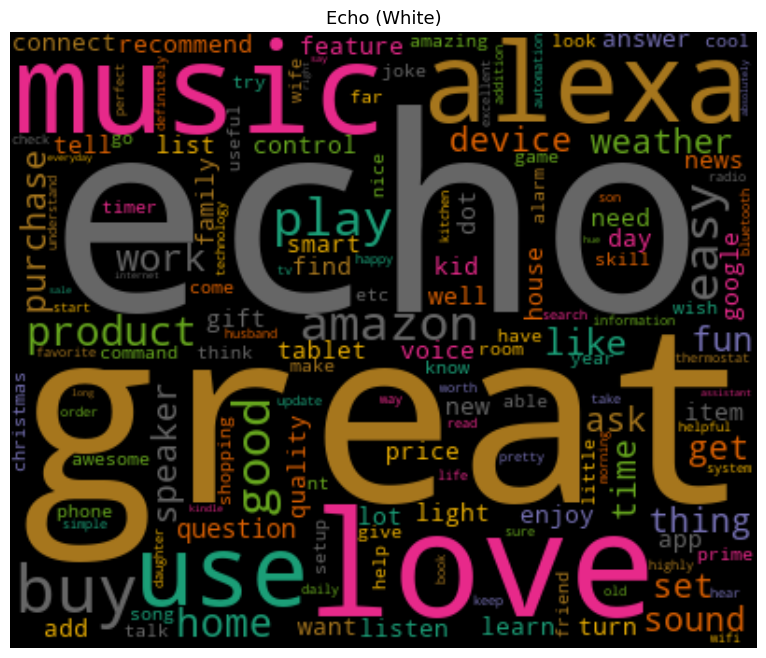

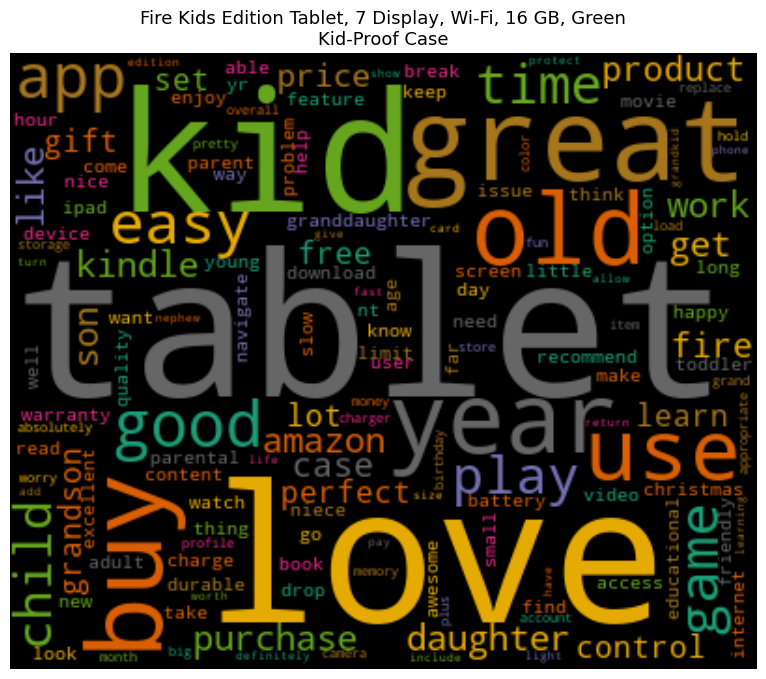

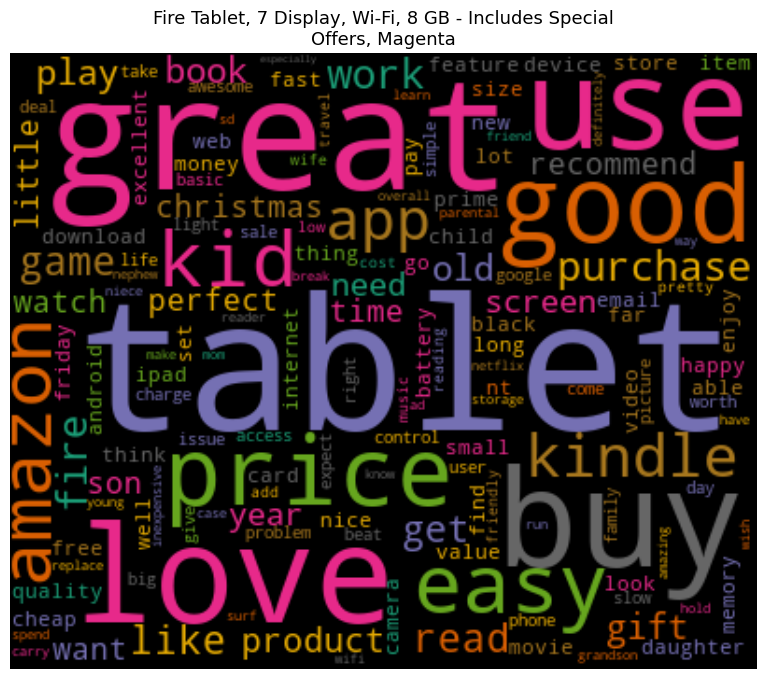

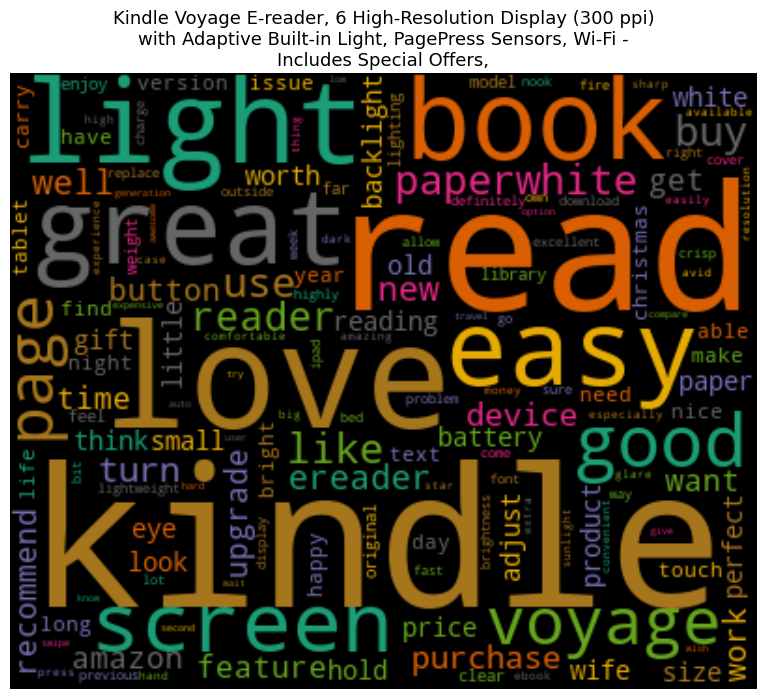

In [65]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Here, we can see that LOVE, USE, BUY, GREAT, and EASY are the most frequently occurring words for almost every product. This means that users are loving products from Amazon and found purchasing them a great decision. They also found them easy to use.

Now, let’s say Amazon wants to dig deeper into this and wants to know which products they should improve. We can find the answer to this question by doing a sentiment analysis of the reviews for each product. Sentiment analysis is the analysis of how much a piece of text is positive and opinionated.
Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the TextBlob library in Python

In [29]:
!pip install TextBlob

In [30]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [31]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Excellent tablet I have used , I will recommend to my friends.
Review 2:
 My son wanted a tablet just for his books. We looked at e-readers and tablets, this was so much better and the price was perfect.
Review 3:
 Echo and Alexa are so ez and do so much....more than I can use but much I have to learn. AWESOME. THANKS


In [32]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 2:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 3:
 I really like the Paperwhite, it made me want to read books on my Kindle again. Try it if you hate it, return it, but get your hands on this for a while, and I am convinced you will keep it.


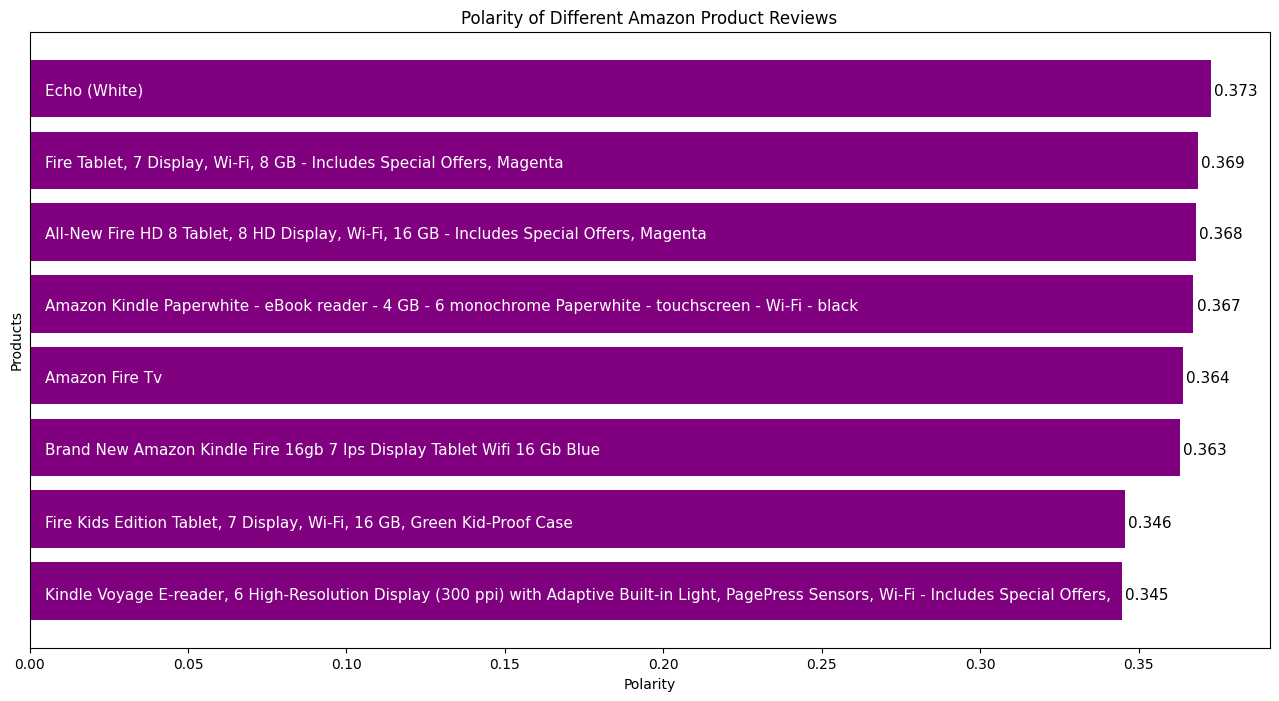

In [33]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()


In [34]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

In [35]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,reviews.rating,cleaned,lemmatized,polarity,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,5.0,this product so far has not disappointed my ch...,product far disappoint child love use like abi...,0.300000,2
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,5.0,great for beginner or experienced person bough...,great beginner experienced person buy gift love,0.700000,2
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,5.0,inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrille...,0.600000,2
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,4.0,i have had my fire hd two weeks now and i love...,fire hd week love tablet great valuewe prime m...,0.432222,2
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,5.0,i bought this for my grand daughter when she c...,buy grand daughter come visit set user enter a...,0.258929,2
...,...,...,...,...,...,...,...,...,...
26063,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,5.0,it has many uses you can listen to music check...,use listen music check weather listen podcast ...,0.000000,2
26064,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,5.0,cost is not outrageous easy setup fun to use a...,cost outrageous easy setup fun use sync iphone...,-0.088889,2
26065,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,5.0,i knew about this from its crowd funding start...,know crowd funding start wish jump board excel...,0.512500,2
26066,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,3.0,this is a neat product but did not fit my need...,neat product fit needsi bluetooth device recog...,0.533333,1


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(df['lemmatized']).toarray()
texts=pd.DataFrame(text)
num_words = len(text)
print("Number of unique words:", num_words)

Number of unique words: 26068


In [37]:
from sklearn.model_selection import train_test_split
y=df["sentiment"]
X=texts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=5, max_iter=1000, random_state=0, solver='liblinear',
                   verbose=1)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print('Train accuracy :', (lr.score(X_train, y_train))*100)
print('Test accuracy :', (lr.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(X_test)))

Train accuracy : 94.94581375275727
Test accuracy : 93.45991561181435

 CONFUSION MATRIX
[[  21   11   92]
 [   9   22  206]
 [   5   18 4830]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.60      0.17      0.26       124
           1       0.43      0.09      0.15       237
           2       0.94      1.00      0.97      4853

    accuracy                           0.93      5214
   macro avg       0.66      0.42      0.46      5214
weighted avg       0.91      0.93      0.91      5214



# MultinomialNB

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [41]:
print('Train accuracy :', (nb.score(X_train, y_train))*100)
print('Test accuracy :', (nb.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy : 92.99894504651385
Test accuracy : 93.05715381664749

 CONFUSION MATRIX
[[   0    0  124]
 [   0    0  237]
 [   0    1 4852]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.00      0.00      0.00       237
           2       0.93      1.00      0.96      4853

    accuracy                           0.93      5214
   macro avg       0.31      0.33      0.32      5214
weighted avg       0.87      0.93      0.90      5214



C:\Users\wania_96\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wania_96\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wania_96\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BernoulliNB

In [42]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train,y_train)

BernoulliNB()

In [43]:
print('Train accuracy :', (dt.score(X_train, y_train))*100)
print('Test accuracy :', (dt.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

Train accuracy : 92.00153447779802
Test accuracy : 91.02416570771001

 CONFUSION MATRIX
[[   3   21  100]
 [   5   21  211]
 [  19  112 4722]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.11      0.02      0.04       124
           1       0.14      0.09      0.11       237
           2       0.94      0.97      0.96      4853

    accuracy                           0.91      5214
   macro avg       0.40      0.36      0.37      5214
weighted avg       0.88      0.91      0.89      5214



# RandomForestClassifier

In [44]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predicted= classifier.predict(X_test)


In [51]:
print('Train accuracy :', (classifier.score(X_train, y_train))*100)
print('Test accuracy :', (classifier.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

Train accuracy : 99.99520475688118
Test accuracy : 93.11469121595704

 CONFUSION MATRIX
[[   3   21  100]
 [   5   21  211]
 [  19  112 4722]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.11      0.02      0.04       124
           1       0.14      0.09      0.11       237
           2       0.94      0.97      0.96      4853

    accuracy                           0.91      5214
   macro avg       0.40      0.36      0.37      5214
weighted avg       0.88      0.91      0.89      5214

